## Performing the OSE technique from OSEMN 

## No. 1 

In [779]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn import linear_model 
import matplotlib.pyplot as plt
import seaborn as sns

## No. 2/3

In [782]:
Telco_churn_data = pd.read_csv("Telco_churn_data.csv")

In [784]:
Telco_churn_data.head(5)

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
0,No Churn,0,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0


### Interpretation

This dataset analyzes customer churn, showing factors like billing amounts, call averages, account ages, complaints, and delinquency. It reveals patterns such as higher churn rates among customers with billing problems or low call activity. Non-churned customers generally have higher call averages and account ages. Equipment age and month-over-month billing changes also play roles in customer retention.

## No. 4

In [787]:
# Calculating the length (number of rows) of the Telco_churn_data dataset
len(Telco_churn_data)

4708

#### Interpretation

The Telco churn dataset contains 4,708 rows. This represents the number of data entries or customer records in the dataset, which can be used for analysis or modeling.

In [789]:
# Calculating the shape (number of rows and columns) of the Telco_churn_data dataset
Telco_churn_data.shape

(4708, 15)

#### Interpretation

The Telco churn dataset has 4,708 rows and 15 columns. This indicates that the dataset contains 4,708 customer records, each described by 15 different features or attributes.

## No. 5

In [792]:
# Renaming columns in the Telco_churn_data dataset for consistency and readability
Telco_churn_data = Telco_churn_data.rename(columns={'Target Churn': 'Target_Churn', 
                            'Target Code' : 'Target_Code',
                            'Current Bill Amt': 'Current_Bill_Amt',
                            'Avg Calls':'Avg_Calls',
                           'Avg Calls Weekdays':'Avg_Calls_Weekdays',
                           'Account Age':'Account_Age',
                           'Percent Increase MOM':'Percent_Increase_MOM',
                           'Acct Plan Subtype':'Acct_Plan_Subtype',
                           'Complaint Code':'Complaint_Code',
                           'Avg Days Delinquent':'Avg_Days_Delinquent',
                   'Current TechSupComplaints':'Current_TechSupComplaints',
                   'Current Days OpenWorkOrders':'Current_Days_OpenWorkOrders',
                   'Equipment Age':'Equipment_Age',
                   'Condition of Current Handset':'Condition_of_Current_Handset',
                   'Avg Hours WorkOrderOpenned':'Avg_Hours_WorkOrderOpenned',
                   }) 
Telco_churn_data.columns

Index(['Target_Churn', 'Target_Code', 'Current_Bill_Amt', 'Avg_Calls',
       'Avg_Calls_Weekdays', 'Account_Age', 'Percent_Increase_MOM',
       'Acct_Plan_Subtype', 'Complaint_Code', 'Avg_Days_Delinquent',
       'Current_TechSupComplaints', 'Current_Days_OpenWorkOrders',
       'Equipment_Age', 'Condition_of_Current_Handset',
       'Avg_Hours_WorkOrderOpenned'],
      dtype='object')

#### Interpretation

The columns in the Telco churn dataset have been renamed for consistency and readability. The new column names are now formatted with underscores instead of spaces, and they follow a consistent naming convention, making them easier to work with programmatically

In [794]:
Telco_churn_data.describe()

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpenned
count,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4264.000000,4708.000000
mean,0.485769,19828.815845,9269.690314,38127.994973,26.079652,-0.005127,13.968564,0.414826,2.438828,10.811810,1.019231,0.936501
std,0.499851,17204.510108,10437.339850,39172.244943,7.149933,4.481852,10.789062,0.954549,20.197292,8.710548,0.144021,8.926752
min,0.000000,-690.000000,0.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,12288.000000,2602.250002,13031.250025,20.000000,-0.574084,6.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,0.000000,15254.000000,6396.333330,26765.833350,25.000000,-0.185280,12.400000,0.000000,0.000000,9.000000,1.000000,0.000000
75%,1.000000,22799.000000,12250.499975,50061.416675,32.000000,0.121823,19.300000,0.000000,0.000000,17.000000,1.000000,0.000000
max,1.000000,325127.000000,181786.000000,374457.667000,40.000000,210.100000,126.000000,11.000000,368.000000,39.000000,3.000000,297.500000


#### Interpretation

The describe() output for the Telco churn dataset provides summary statistics for each numerical column:

Target_Code: Binary churn indicator (mean ~0.486 suggests balanced classes).
Current_Bill_Amt: Average bill amount is 19828.82, with a wide range from -690 to 325127.
Avg_Calls: Average number of calls is 9269.69, with a large standard deviation indicating high variability.
Avg_Calls_Weekdays: Average calls on weekdays are 38127.99, also with high variability.
Account_Age: Average account age is 26.08 months.
Percent_Increase_MOM: Mean percentage increase month-over-month is slightly negative, indicating a slight decrease on average.
Avg_Days_Delinquent: Average days delinquent is 13.97, with a high maximum of 126 days.
Current_TechSupComplaints: Mean number of tech support complaints is 0.41, with a maximum of 11.
These statistics give an overview of the central tendency, dispersion, and range of the data, highlighting significant variability in customer behavior and billing amounts.

## No. 6

In [797]:
# Displaying the data types of the specified columns in the Telco_churn_data dataset
Telco_churn_data[["Target_Code","Condition_of_Current_Handset","Current_TechSupComplaints"]].dtypes

Target_Code                       int64
Condition_of_Current_Handset    float64
Current_TechSupComplaints         int64
dtype: object

#### Interpretation

The specified columns in the Telco churn dataset have the following data types:

Target_Code: int64 (integer)
Condition_of_Current_Handset: float64 (floating-point number)
Current_TechSupComplaints: int64 (integer)
This information is useful for understanding the type of data stored in each column, which can influence how you handle and analyze these columns.

In [799]:
# Changing the data type of specified columns from continuous to categorical
Telco_churn_data["Target_Code"] = Telco_churn_data["Target_Code"].astype('category')
Telco_churn_data["Condition_of_Current_Handset"] = Telco_churn_data["Condition_of_Current_Handset"].astype('category')
Telco_churn_data["Current_TechSupComplaints"] = Telco_churn_data["Current_TechSupComplaints"].astype('category')

# Verifying the changes by displaying the data types of the specified columns
column_dtypes_after_change = Telco_churn_data[["Target_Code", "Condition_of_Current_Handset", "Current_TechSupComplaints"]].dtypes
column_dtypes_after_change  # Display the updated data types of the specified columns

Target_Code                     category
Condition_of_Current_Handset    category
Current_TechSupComplaints       category
dtype: object

#### Interpretation

The specified columns in the Telco churn dataset have been changed from continuous to categorical data types. The columns Target_Code, Condition_of_Current_Handset, and Current_TechSupComplaints are now of type category. This change is verified by displaying the updated data types, confirming that the transformation was successful. This adjustment is useful for analysis and modeling that requires categorical data types.

In [801]:
Telco_churn_data.dtypes

Target_Churn                      object
Target_Code                     category
Current_Bill_Amt                   int64
Avg_Calls                        float64
Avg_Calls_Weekdays               float64
Account_Age                        int64
Percent_Increase_MOM             float64
Acct_Plan_Subtype                 object
Complaint_Code                    object
Avg_Days_Delinquent              float64
Current_TechSupComplaints       category
Current_Days_OpenWorkOrders      float64
Equipment_Age                      int64
Condition_of_Current_Handset    category
Avg_Hours_WorkOrderOpenned       float64
dtype: object

## No. 7

In [804]:
# Checking if there are any missing values in the Telco_churn_data dataset
Telco_churn_data.isnull().values.any()

True

#### Interpretation

The Telco churn dataset contains missing values, as indicated by the result True from the .isnull().values.any() check. This means that at least one cell in the dataset has a null or missing value, which should be addressed before proceeding with further analysis or modeling.

In [806]:
#It seems we have some missing values now let us explore what are the columns #having missing values

Telco_churn_data.isnull().any()
## it seems that we have missing values in Complaint Code, and Condition_of_Current_Handset

Target_Churn                    False
Target_Code                     False
Current_Bill_Amt                False
Avg_Calls                       False
Avg_Calls_Weekdays              False
Account_Age                     False
Percent_Increase_MOM            False
Acct_Plan_Subtype               False
Complaint_Code                   True
Avg_Days_Delinquent             False
Current_TechSupComplaints       False
Current_Days_OpenWorkOrders     False
Equipment_Age                   False
Condition_of_Current_Handset     True
Avg_Hours_WorkOrderOpenned      False
dtype: bool

In [808]:
# Create a copy of the original data
Telco_churn_data_copy = Telco_churn_data.copy()

# Checking if the 'Complaint_Code' column is numeric and converting if necessary
Telco_churn_data_copy['Complaint_Code'] = pd.to_numeric(Telco_churn_data_copy['Complaint_Code'], errors='coerce')

# Calculating the mean value of the 'Complaint_Code' column after conversion
mean_value = Telco_churn_data_copy['Complaint_Code'].mean()

# Filling the missing values in the 'Complaint_Code' column with the calculated mean
Telco_churn_data_copy['Complaint_Code'] = Telco_churn_data_copy['Complaint_Code'].fillna(mean_value)

# Verifying that there are no more missing values in the 'Complaint_Code' column
missing_values_after_replacement = Telco_churn_data_copy['Complaint_Code'].isnull().sum()
missing_values_after_replacement  # Display the count of missing values after replacement

# Displaying the first few rows to confirm the changes
Telco_churn_data_copy[['Complaint_Code']].head()

,Complaint_Code
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [810]:
# Replacing missing values with a specific value, e.g., 0
Telco_churn_data_copy['Complaint_Code'] = Telco_churn_data_copy['Complaint_Code'].fillna(0)

# Verifying that there are no more missing values in the 'Complaint_Code' column
missing_values_after_replacement = Telco_churn_data_copy['Complaint_Code'].isnull().sum()
print(f"Missing values after replacement: {missing_values_after_replacement}")

# Displaying the first few rows to confirm the changes
Telco_churn_data_copy[['Complaint_Code']].head()


Missing values after replacement: 0


,Complaint_Code
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [812]:
# Counting the occurrences of each unique value in the 'Condition_of_Current_Handset' column
Telco_churn_data_copy['Condition_of_Current_Handset'].value_counts()

Condition_of_Current_Handset
1.0    4186
2.0      74
3.0       4
Name: count, dtype: int64

In [814]:
# Finding the mode (most frequent value) of the 'Condition_of_Current_Handset' column
mode_value = Telco_churn_data_copy['Condition_of_Current_Handset'].mode()[0]

# Replacing the missing values in the 'Condition_of_Current_Handset' column with the mode
Telco_churn_data_copy['Condition_of_Current_Handset'].fillna(mode_value, inplace=True)

# Verifying that there are no more missing values in the 'Condition_of_Current_Handset' column
missing_values_after_replacement = Telco_churn_data_copy['Condition_of_Current_Handset'].isnull().sum()
missing_values_after_replacement  # Display the count of missing values after replacement

0

#### Interpretation

The code replaces missing values in the Condition_of_Current_Handset column with the most frequent value (mode). After replacement, there are no remaining missing values in this column, as verified by the count of 0.

In [816]:
##checking for any missing values
Telco_churn_data_copy.isnull().any()

Target_Churn                    False
Target_Code                     False
Current_Bill_Amt                False
Avg_Calls                       False
Avg_Calls_Weekdays              False
Account_Age                     False
Percent_Increase_MOM            False
Acct_Plan_Subtype               False
Complaint_Code                  False
Avg_Days_Delinquent             False
Current_TechSupComplaints       False
Current_Days_OpenWorkOrders     False
Equipment_Age                   False
Condition_of_Current_Handset    False
Avg_Hours_WorkOrderOpenned      False
dtype: bool

#### Interpretation

The updated check for missing values in the Telco_churn_data_copy dataset shows that there are no missing values in any of the specified columns. Each column has a value of False for missing values, indicating that the dataset is complete and does not contain any null entries.

## No. 8

In [822]:
Telco_churn_data_copy['Target_Churn'].value_counts(0)

Target_Churn
No Churn    2421
Churn       2287
Name: count, dtype: int64

In [824]:
Telco_churn_data_copy['Target_Churn'].value_counts(1)*100

Target_Churn
No Churn    51.42311
Churn       48.57689
Name: proportion, dtype: float64

In [826]:
# Ensure all relevant columns are numeric
numeric_columns = ['Target_Code', 'Current_Bill_Amt', 'Avg_Calls', 'Avg_Calls_Weekdays', 'Account_Age', 'Percent_Increase_MOM']
Telco_churn_data_copy[numeric_columns] = Telco_churn_data_copy[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Grouping the data by 'Target_Churn' and calculating the mean for each group
target_churn_summary = Telco_churn_data_copy.groupby('Target_Churn').agg({
    'Target_Code': 'mean',
    'Current_Bill_Amt': 'mean',
    'Avg_Calls': 'mean',
    'Avg_Calls_Weekdays': 'mean',
    'Account_Age': 'mean',
    'Percent_Increase_MOM': 'mean'
})

# Displaying the summary
target_churn_summary.head()

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM
Target_Churn,,,,,,
Churn,1.0,20182.709226,9348.878298,37524.030899,25.418452,-0.281309
No Churn,0.0,19494.510120,9194.885309,38698.530221,26.704254,0.255769


#### Interpretation

The summary of the Telco churn data shows that churned customers have a higher average current bill amount, make fewer calls, have slightly lower account ages, and experience a negative month-over-month percentage increase, compared to non-churned customers.

## No. 9

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_Days_OpenWorkOrders,Equipment_Age,Avg_Hours_WorkOrderOpenned
Target_Code,1.000000,0.019995,0.007375,-0.014987,-0.089890,-0.059899,0.460092,0.002891,0.042373,0.002611
Current_Bill_Amt,0.019995,1.000000,0.352535,0.428040,0.003292,-0.015588,0.024285,0.076418,-0.040732,0.016852
Avg_Calls,0.007375,0.352535,1.000000,0.727226,-0.023758,-0.040899,0.019407,0.078428,-0.099348,0.013441
Avg_Calls_Weekdays,-0.014987,0.428040,0.727226,1.000000,0.029957,-0.044496,0.017134,0.065318,-0.103769,0.013577
Account_Age,-0.089890,0.003292,-0.023758,0.029957,1.000000,-0.004022,-0.047542,-0.026270,0.073503,0.005059
Percent_Increase_MOM,-0.059899,-0.015588,-0.040899,-0.044496,-0.004022,1.000000,0.049768,-0.003013,-0.003819,-0.008848
Avg_Days_Delinquent,0.460092,0.024285,0.019407,0.017134,-0.047542,0.049768,1.000000,-0.001686,0.014047,0.000168
Current_Days_OpenWorkOrders,0.002891,0.076418,0.078428,0.065318,-0.026270,-0.003013,-0.001686,1.000000,-0.037599,0.029384
Equipment_Age,0.042373,-0.040732,-0.099348,-0.103769,0.073503,-0.003819,0.014047,-0.037599,1.000000,-0.014347
Avg_Hours_WorkOrderOpenned,0.002611,0.016852,0.013441,0.013577,0.005059,-0.008848,0.000168,0.029384,-0.014347,1.000000


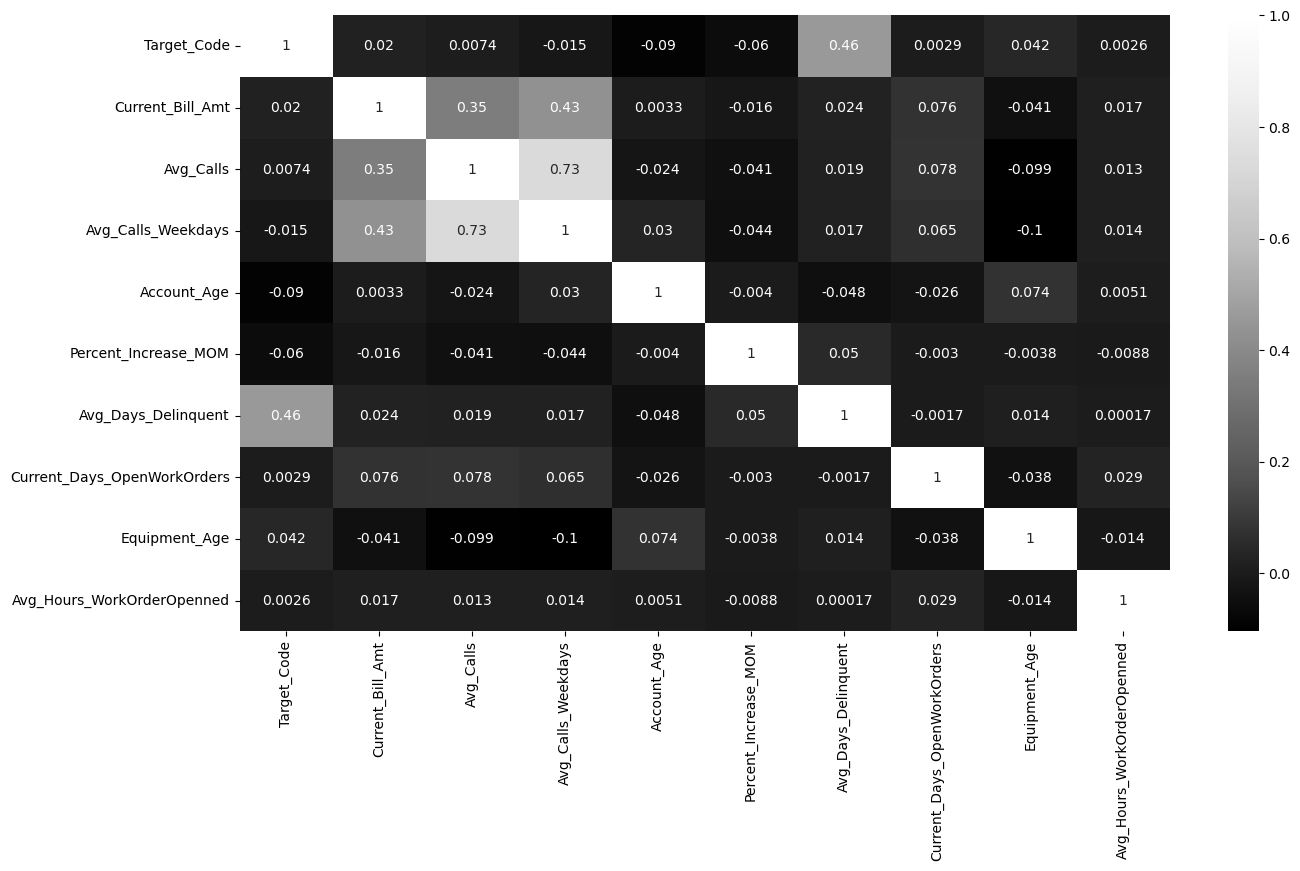

In [765]:
# Ensure all relevant columns are numeric
Telco_churn_data = ['Target_Code', 'Current_Bill_Amt', 'Avg_Calls', 'Avg_Calls_Weekdays', 'Account_Age',
                      'Percent_Increase_MOM', 'Avg_Days_Delinquent', 'Current_Days_OpenWorkOrders', 'Equipment_Age', 'Avg_Hours_WorkOrderOpenned']
Telco_churn_data_copy[columns_to_convert] = Telco_churn_data_copy[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = Telco_churn_data_copy[columns_to_convert].corr()


# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(15,8)) 
sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns.values,
            yticklabels=correlation_matrix.columns.values,
            annot=True,cmap='Greys_r') 
correlation_matrix

#### Interpretation

The Target_Code has a strong positive correlation with Avg_Days_Delinquent (0.46) but weak relationships with other features. Current_Bill_Amt shows moderate positive correlations with Avg_Calls (0.35) and Avg_Calls_Weekdays (0.43), linking higher bill amounts to more calls. Avg_Calls and Avg_Calls_Weekdays are strongly correlated (0.73), while other correlations are minor. Account_Age, Percent_Increase_MOM, and Current_Days_OpenWorkOrders have weak correlations with all variables. Equipment_Age has weak negative correlations with Avg_Calls and Avg_Calls_Weekdays (-0.10). Avg_Hours_WorkOrderOpenned also shows weak correlations with all features.

In summary, the strongest relationships are between Avg_Calls and Avg_Calls_Weekdays (0.73) and between Target_Code and Avg_Days_Delinquent (0.46), while most other features are largely independent.

## No. 10

### Univariate Analyses

(Text(0.5, 1.0, 'Current_Bill_Amt'), Text(0, 0.5, 'No of Customers'))

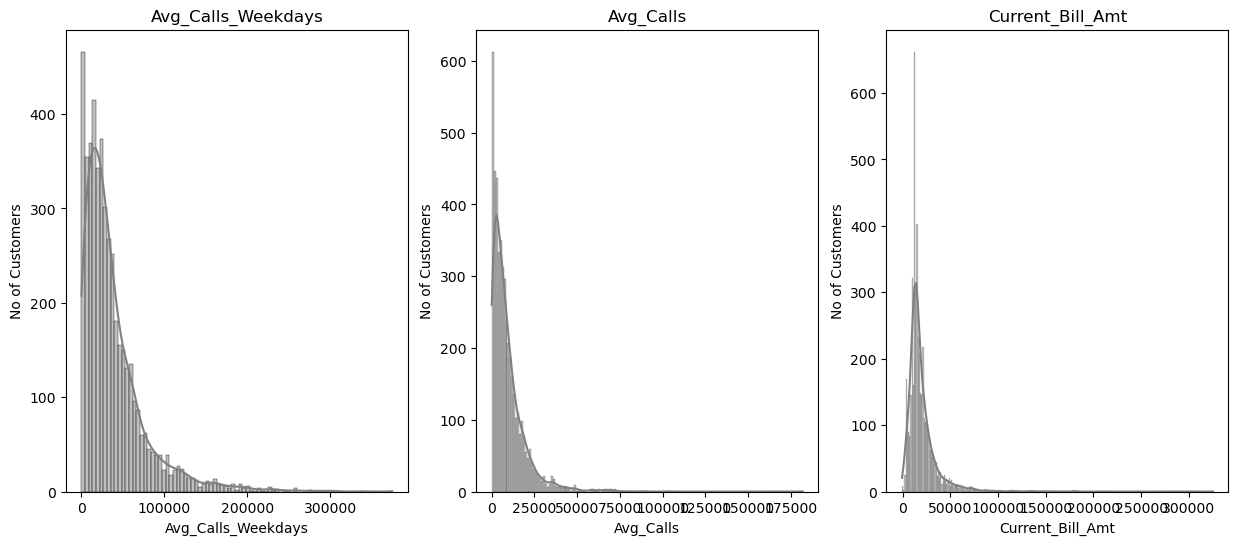

In [839]:
# Create subplots
f, axes = plt.subplots(ncols=3, figsize=(15, 6)) 

# Plotting Avg_Calls_Weekdays using histplot
sns.histplot(Telco_churn_data_copy.Avg_Calls_Weekdays, kde=True, color="gray", ax=axes[0]).set_title('Avg_Calls_Weekdays'), axes[0].set_ylabel('No of Customers') 

# Plotting Avg_Calls using histplot
sns.histplot(Telco_churn_data_copy.Avg_Calls, kde=True, color="gray", ax=axes[1]).set_title('Avg_Calls'), axes[1].set_ylabel('No of Customers') 

# Plotting Current_Bill_Amt using histplot
sns.histplot(Telco_churn_data_copy.Current_Bill_Amt, kde=True, color="gray", ax=axes[2]).set_title('Current_Bill_Amt'), axes[2].set_ylabel('No of Customers')

#### Interpretation


The subplots display histograms for Avg_Calls_Weekdays, Avg_Calls, and Current_Bill_Amt:

Avg_Calls_Weekdays: The distribution is heavily right-skewed, with most customers making fewer weekday calls. The number of customers decreases as the number of calls increases.

Avg_Calls: Similar to the weekday calls, the overall call distribution is right-skewed, indicating that a majority of customers make a relatively small number of calls, while a few customers make a significantly higher number of calls.

Current_Bill_Amt: The bill amount distribution is also right-skewed. Most customers have lower billing amounts, with a few having exceptionally high bills.

In all three plots, the right-skewness suggests that the majority of values are concentrated on the lower end, with a long tail extending towards higher values.

### Bivariate Analyses

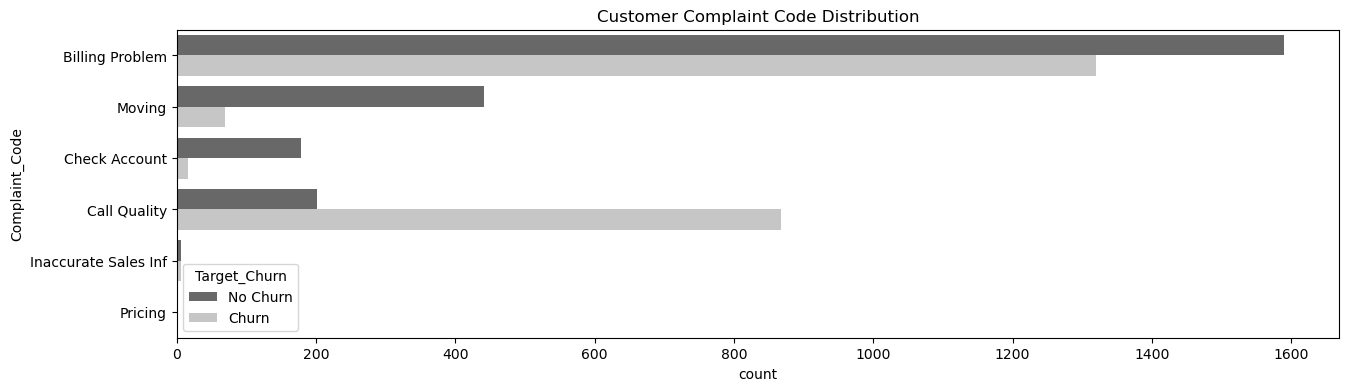

In [843]:
plt.figure(figsize=(15, 4))
p = sns.countplot(y="Complaint_Code", hue='Target_Churn', data=Telco_churn_data, palette="Greys_r")

# Update the legend text
legend = p.get_legend()
legend_texts = legend.texts
legend_texts[0].set_text("No Churn")
legend_texts[1].set_text("Churn")

# Set the title
p.set_title('Customer Complaint Code Distribution')

# Display the plot
plt.show()

#### Interpretation

The count plot shows the distribution of customer complaint codes, differentiated by churn status:

Billing Problem is the most common complaint among both churned and non-churned customers, with a higher count in the non-churned group.
Moving is the second most common complaint, more prevalent among churned customers.
Other complaints like Check Account, Call Quality, Inaccurate Sales Information, and Pricing have lower frequencies and show varying distributions between churned and non-churned customers.
This distribution helps identify common issues faced by customers and their potential link to churn behavior.

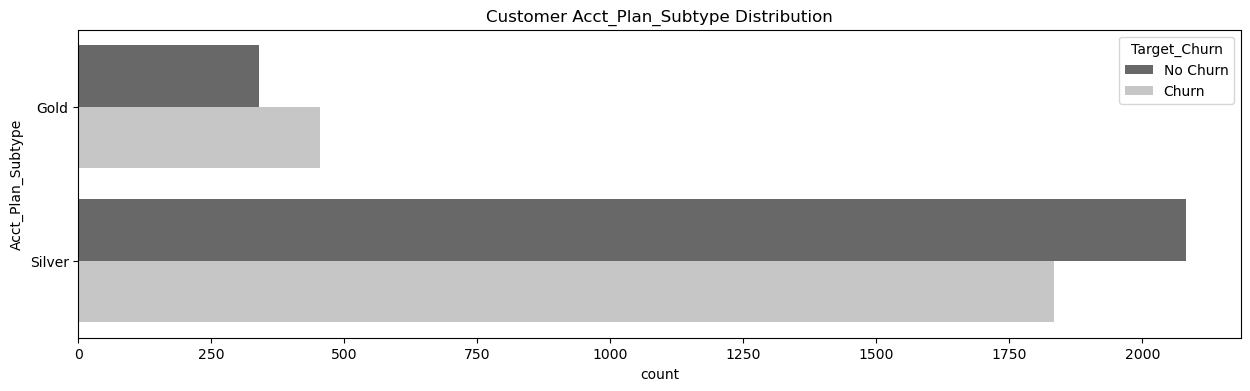

In [853]:
plt.figure(figsize=(15, 4))
p = sns.countplot(y="Acct_Plan_Subtype", hue='Target_Churn', data=Telco_churn_data, palette="Greys_r")

# Update the legend text
legend = p.get_legend()
legend_texts = legend.texts
legend_texts[0].set_text("No Churn")
legend_texts[1].set_text("Churn")

# Set the title
p.set_title('Customer Acct_Plan_Subtype Distribution')

# Display the plot
plt.show()

#### Interpretation

The count plot displays the distribution of customer account plan subtypes, categorized by churn status:

Silver plan has the highest number of customers, with more non-churned customers compared to churned customers.
Gold plan also shows a higher count of non-churned customers compared to churned customers but in a lower overall count compared to the Silver plan.
This distribution indicates that customers on the Silver plan are more numerous, and churn is less prevalent in both plan subtypes compared to non-churned customers.

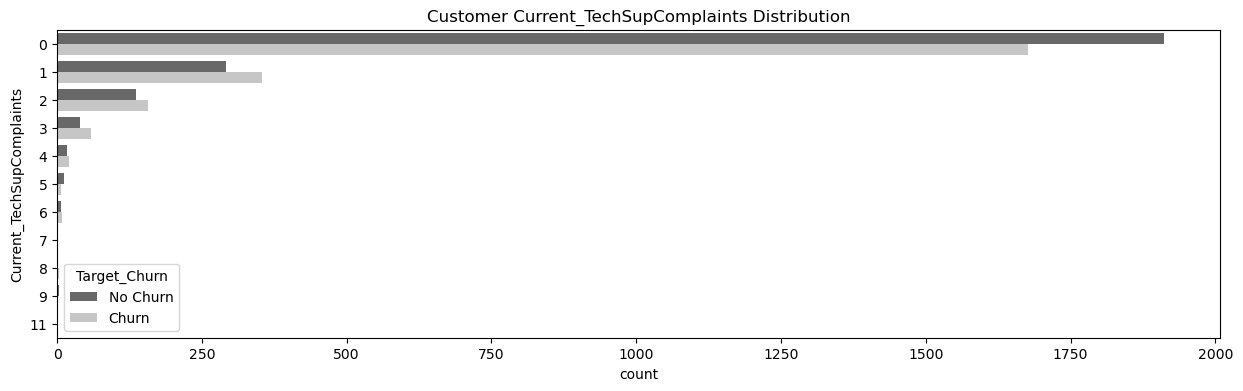

In [855]:
plt.figure(figsize=(15, 4))
p = sns.countplot(y="Current_TechSupComplaints", hue='Target_Churn', data=Telco_churn_data, palette="Greys_r")

# Update the legend text
legend = p.get_legend()
legend_texts = legend.texts
legend_texts[0].set_text("No Churn")
legend_texts[1].set_text("Churn")

# Set the title
p.set_title('Customer Current_TechSupComplaints Distribution')

# Display the plot
plt.show()

#### Interpretation

The count plot displays the distribution of current technical support complaints, categorized by churn status:

Most customers, both churned and non-churned, have 0 technical support complaints.
Among those with complaints, churned customers tend to have slightly more complaints compared to non-churned customers.
The number of complaints decreases significantly as the number of complaints increases, with very few customers having more than 3 complaints.
This distribution suggests that while most customers do not report technical support issues, having more complaints is associated with a higher likelihood of churn.

Text(0.5, 1.0, 'Average no of Days Delinquent/Defaulted from paying - churn vs no churn')

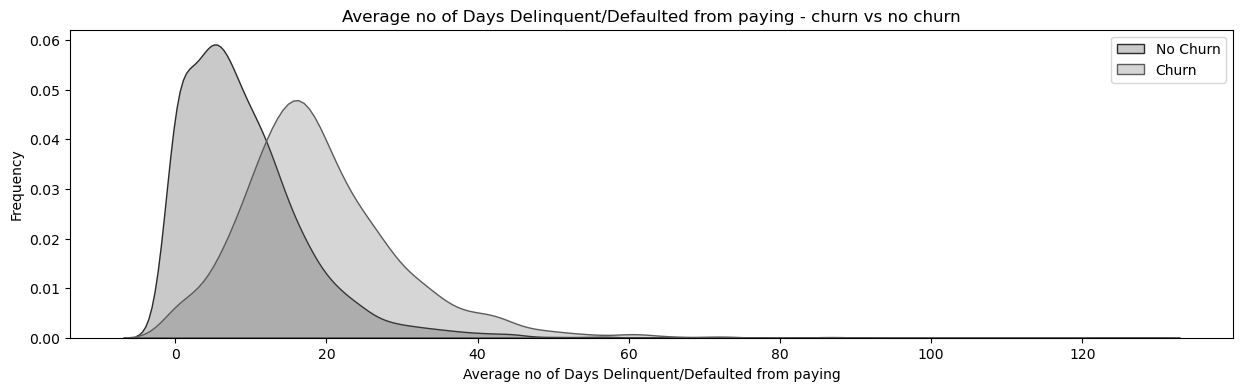

In [875]:
# Create the KDE plot
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(Telco_churn_data.loc[(Telco_churn_data['Target_Code'] == 0),'Avg_Days_Delinquent'] , 
               color=sns.color_palette("Greys_r")[0], 
               fill=True,label='no churn') 
ax=sns.kdeplot(Telco_churn_data.loc[(Telco_churn_data['Target_Code'] == 1),'Avg_Days_Delinquent'] , 
               color=sns.color_palette("Greys_r")[1], 
               fill=True, label='Target_Churn') 

# Update the legend text
legend = plt.legend()
legend_texts = legend.get_texts()
legend_texts[0].set_text("No Churn")
legend_texts[1].set_text("Churn")

ax.set(xlabel='Average no of Days Delinquent/Defaulted from paying',ylabel='Frequency') 
plt.title('Average no of Days Delinquent/Defaulted from paying - churn vs no churn') 

#### Interpretation

The KDE plot shows that:

No Churn: The distribution is right-skewed, with most customers having a low average number of delinquent days, peaking around 10 days.
Churn: The distribution is also right-skewed but with a wider spread, indicating that customers who churn tend to have a higher average number of delinquent days.
In summary, customers who churn have more delinquent days on average compared to those who do not churn.

Text(0.5, 1.0, 'Account_Age - churn vs no churn')

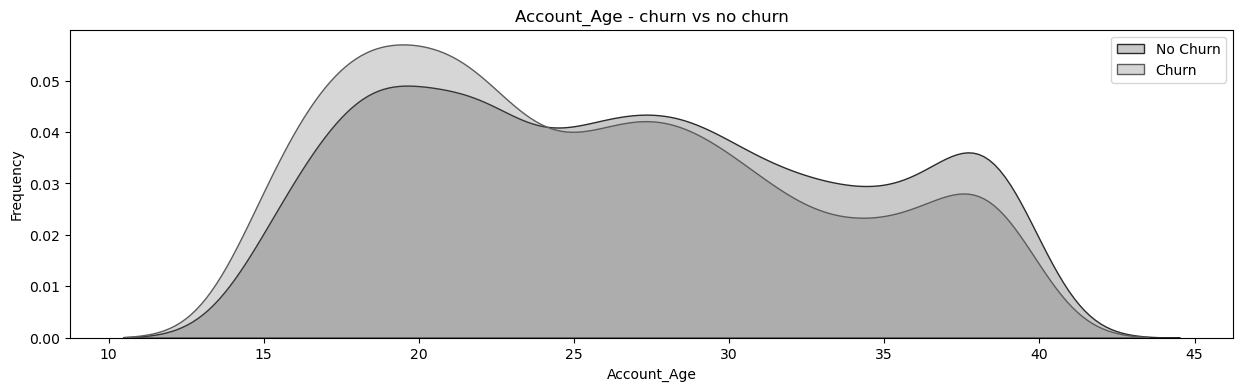

In [877]:
# Create the KDE plot
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(Telco_churn_data.loc[(Telco_churn_data['Target_Code'] == 0),'Account_Age'] , 
               color=sns.color_palette("Greys_r")[0], 
               fill=True,label='no churn') 
ax=sns.kdeplot(Telco_churn_data.loc[(Telco_churn_data['Target_Code'] == 1),'Account_Age'] , 
               color=sns.color_palette("Greys_r")[1], 
               fill=True, label='Target_Churn') 

# Update the legend text
legend = plt.legend()
legend_texts = legend.get_texts()
legend_texts[0].set_text("No Churn")
legend_texts[1].set_text("Churn")

ax.set(xlabel='Account_Age',ylabel='Frequency') 
plt.title('Account_Age - churn vs no churn') 

#### Interpretation

The KDE plot shows the distribution of account ages for customers who churn and those who do not. Both distributions peak around an account age of 20, with a secondary peak around 35, indicating that customers with account ages around these values have a higher frequency of both churning and not churning. However, there are no significant differences between the two distributions, suggesting that account age alone is not a strong predictor of churn.

Text(0.5, 1.0, 'Percent_Increase_MOM - churn vs no churn')

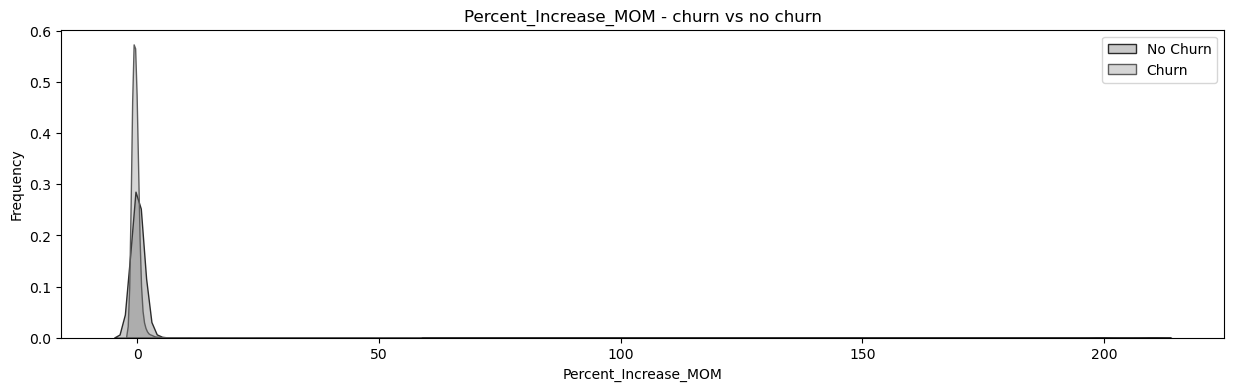

In [879]:
# Create the KDE plot
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(Telco_churn_data.loc[(Telco_churn_data['Target_Code'] == 0),'Percent_Increase_MOM'] , 
               color=sns.color_palette("Greys_r")[0], 
               fill=True,label='no churn') 
ax=sns.kdeplot(Telco_churn_data.loc[(Telco_churn_data['Target_Code'] == 1),'Percent_Increase_MOM'] , 
               color=sns.color_palette("Greys_r")[1], 
               fill=True, label='Target_Churn') 

# Update the legend text
legend = plt.legend()
legend_texts = legend.get_texts()
legend_texts[0].set_text("No Churn")
legend_texts[1].set_text("Churn")

ax.set(xlabel='Percent_Increase_MOM',ylabel='Frequency') 
plt.title('Percent_Increase_MOM - churn vs no churn') 

#### Interpretation

The KDE plot for Percent Increase MOM (Month Over Month) shows a highly concentrated distribution near zero for both churn and no churn groups. The distributions for both groups are almost identical, indicating that there is no significant difference in the percent increase in bill amounts between customers who churn and those who do not. This suggests that Percent Increase MOM is not a strong predictor of customer churn.